# **Investigate Hotel Business using Data Visualization**

## **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import plotly.express as px

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

def load_dataset(path):
    df = pd.read_csv(path)
    return df

df = load_dataset('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## **Data Preprocessing**

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Handling Missing Values**

In [5]:
# total null values
total_null = pd.DataFrame(df.isna().sum()).T.rename({0:'total_null'})

# percentage null values
null_percentage = pd.DataFrame(100*df.isna().sum()/df.shape[0]).T.rename({0:'null_percentage'})

# combine the columns
data_null = pd.concat([total_null, null_percentage]).T

# only show columns that have missing values
mask = data_null['total_null'] != 0
data_null.loc[mask].sort_values('total_null', ascending=False).style.format({'total_null':'{:.0f}', 'null_percentage':'{:.3f}'})

,total_null,null_percentage
company,112593,94.307
agent,16340,13.686
city,488,0.409
children,4,0.003


In [6]:
df['company'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['city'].fillna('unknown', inplace=True)
df['children'].fillna(df['children'].median(), inplace=True)

### **Correcting Unsuitable Values**

In [7]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [8]:
df['meal'] = df['meal'].replace({'Undefined':'No Meal'})

In [9]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [10]:
for col in ['children', 'agent', 'company']:
    df[col] = df[col].astype(int)

### **Handle Duplicated Data** 

In [11]:
df.duplicated().sum()

33261

In [12]:
df[df.duplicated(keep=False)].reset_index(drop=True).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out
1,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out
2,Resort Hotel,0,72,2017,September,27,1,2,4,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250,0,0,Personal,84.67,0,1,Check-Out
3,Resort Hotel,0,72,2017,September,27,1,2,4,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250,0,0,Personal,84.67,0,1,Check-Out
4,Resort Hotel,0,70,2017,September,27,2,2,3,2,0,0,Dinner,Kabupaten Tangerang,Direct,Direct,0,0,0,0,No Deposit,250,0,0,Personal,137.00,0,1,Check-Out


In [13]:
print(f"Total number of rows before dropping duplicated data: {df.shape}")
df = df.drop_duplicates()
print(f"Total number of rows without duplicated data: {df.shape}")

Total number of rows before dropping duplicated data: (119390, 29)
Total number of rows without duplicated data: (86129, 29)


In [14]:
zero_guest = (
    (df['adults'] == 0) & 
    (df['children'] == 0) & 
    (df['babies'] == 0)
)
zero_night = (
    (df['stays_in_weekend_nights'] == 0) & 
    (df['stays_in_weekdays_nights'] == 0)
)

df_1 = df.loc[~zero_guest].copy()
df_cleaned = df_1.loc[~zero_night].reset_index(drop=True).copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85378 entries, 0 to 85377
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int32  
 11  babies                          85378 non-null  int64  
 12  meal                            

In [15]:
pd.set_option('max_columns', 50)
df = pd.read_csv('cleaned_hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75.0,0,0,Check-Out
1,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75.0,0,0,Check-Out
2,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98.0,0,1,Check-Out
3,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107.0,0,0,Check-Out
4,Resort Hotel,0,9,2017,September,27,1,0,2,2,0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303,0,0,Personal,103.0,0,1,Check-Out


## **Monthly Hotel Booking Analysis Based on Hotel Type**

In [16]:
def monthly_booking(df):
    df = df.copy()
    
    # grouping the number of booking per each hotel and month
    dfg = df.groupby(['hotel', 'arrival_date_month']).agg({
        "arrival_date_year": "nunique",
        "reservation_status": "count"
    })
    dfg = dfg.reset_index()
    dfg.columns = ['hotel_type', 'month', 'no_unique_year', 'booking_count']
    
    # normalize the data by calculating average booking per each month
    dfg['avg_booking_count'] = dfg['booking_count'] / dfg['no_unique_year']
    dfg['avg_booking_count'] = dfg['avg_booking_count'].astype(int)
    
    # map the month into integer for sorting
    month_to_int = { 
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12, 
    }
    dfg['month_int'] = dfg['month'].map(month_to_int)
    dfg['month'] = dfg['month'].apply(lambda x: str(x)[:3])
    
    # sort the dataframe by hotel type and month 
    dfg = dfg.sort_values(by=['hotel_type', 'month_int'])
    
    
    return dfg[['hotel_type', 'month', 'avg_booking_count']]
    
monthly_booking(df)

,hotel_type,month,avg_booking_count
4,City Hotel,Jan,1424
3,City Hotel,Feb,1476
7,City Hotel,Mar,1337
0,City Hotel,Apr,1757
8,City Hotel,May,2388
6,City Hotel,Jun,2508
5,City Hotel,Jul,2660
1,City Hotel,Aug,2454
11,City Hotel,Sep,1885
10,City Hotel,Oct,2157


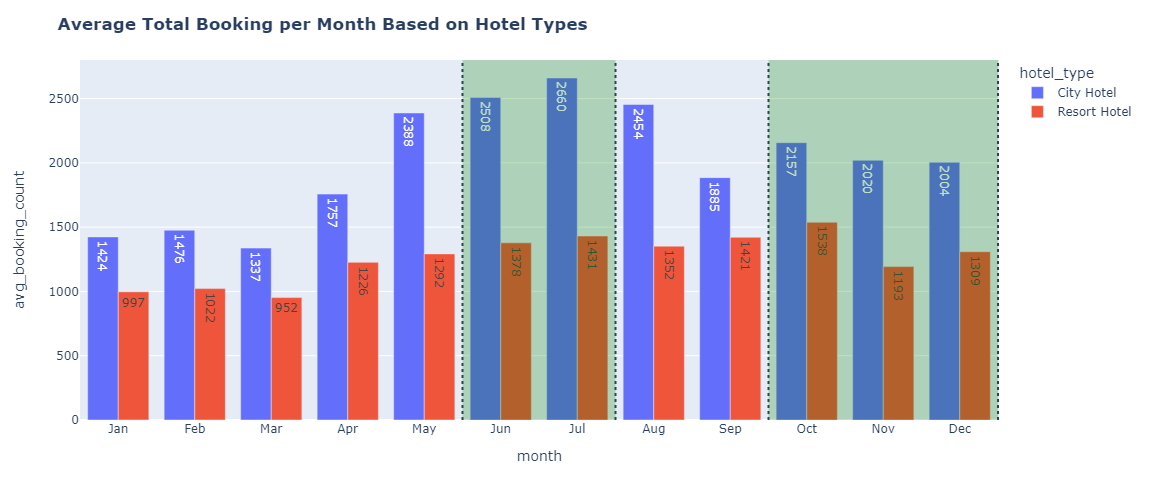

In [17]:
dfg = monthly_booking(df)
fig = px.bar(dfg, x='month',
             y='avg_booking_count',
             color='hotel_type',
             barmode='group',
             text='avg_booking_count',
             height=500
            )

fig.add_vline(x=4.5, line_dash="dot")
fig.add_vline(x=6.5, line_dash="dot")
fig.add_vrect(x0='4.5', x1='6.5', col=1,
              fillcolor='green', opacity=0.25, line_width=0)

fig.add_vline(x=8.5, line_dash="dot")
fig.add_vline(x=11.5, line_dash="dot")
fig.add_vrect(x0='8.5', x1='11.5', col=1,
              fillcolor='green', opacity=0.25, line_width=0)


fig.update_layout(
    title_text='<b>Average Total Booking per Month Based on Hotel Types<br>',
)

## **Impact Analaysis of Stay Duration on Hotel Bookings Cancellation Rates**

In [18]:
# create new feature: total stay duration
df['total_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df['total_duration'].value_counts()

3     17527
1     16908
2     15332
4     13382
7      7464
5      6698
6      3249
10     1071
8      1059
14      857
9       778
11      366
12      196
13      132
15       69
21       55
28       34
16       33
19       22
18       22
17       20
25       14
29       13
20       13
22       12
30       11
26        6
24        6
23        5
35        5
27        4
42        4
56        2
33        2
60        1
69        1
46        1
45        1
38        1
48        1
34        1
Name: total_duration, dtype: int64

In [19]:
def duration_and_cancelation(df):
    df = df.copy()
    
    # grouping the stay duration per week
    def grouping_week(row):
        if row < 14:
            return row
        if row >= 14:
            return 14
    df['duration_group'] = df['total_duration'].apply(grouping_week)
    
    # aggregating is_cancelled
    df_agg = df.groupby(['hotel', 'duration_group']).agg({
        'is_canceled': ['sum', 'count']
    })
    df_agg = df_agg.reset_index()
    df_agg.columns = ['hotel_type', 'duration_group', 'total_cancellation', 'total_booking']
    
    # calculate cancellation rate
    df_agg['cancellation_rate'] = df_agg['total_cancellation'] * 100 / df_agg['total_booking']
    df_agg['cancellation_rate'] = df_agg['cancellation_rate'].round(2)
    
    return df_agg
        
duration_and_cancelation(df)

,hotel_type,duration_group,total_cancellation,total_booking,cancellation_rate
0,City Hotel,1,2259,10100,22.37
1,City Hotel,2,3133,10507,29.82
2,City Hotel,3,4182,13318,31.40
3,City Hotel,4,3059,9499,32.20
4,City Hotel,5,1257,4144,30.33
5,City Hotel,6,610,1632,37.38
6,City Hotel,7,692,1837,37.67
7,City Hotel,8,166,361,45.98
8,City Hotel,9,87,198,43.94
9,City Hotel,10,110,188,58.51


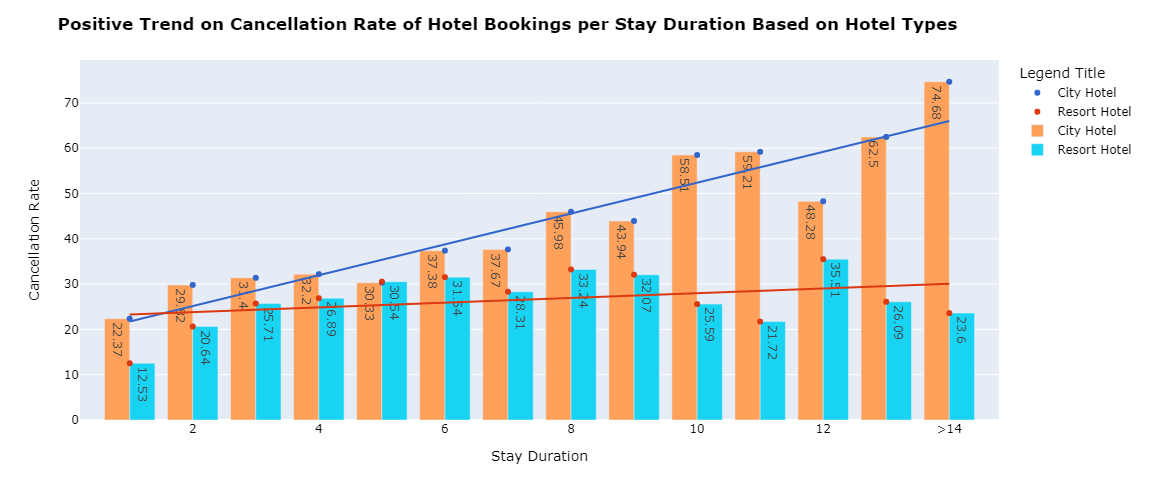

In [20]:
df_agg = duration_and_cancelation(df)
city = df_agg[df_agg['hotel_type']=='City Hotel']
resort = df_agg[df_agg['hotel_type']=='Resort Hotel']
fig = px.scatter(df_agg,
                 x='duration_group',
                 y='cancellation_rate',
                 color='hotel_type',
                 trendline='ols',
                 height=500,
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.add_bar(x=city['duration_group'],
            y=city['cancellation_rate'],
            name='City Hotel',
            text=city['cancellation_rate']
            )
fig.add_bar(x=resort['duration_group'],
            y=resort['cancellation_rate'],
            name='Resort Hotel',
            text=resort['cancellation_rate']
            )
fig.update_layout(
    title='<b>Positive Trend on Cancellation Rate of Hotel Bookings\nper Stay Duration Based on Hotel Types<b>',
    xaxis_title='Stay Duration',
    yaxis_title='Cancellation Rate',
    legend_title="Legend Title",
    font=dict(
        size=12,
        color='black'
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = [2, 4, 6, 8, 10, 12, 14],
        ticktext = ['2', '4', '6', '8', '10', '12', '>14']
    )
)
fig.show()

## **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

In [21]:
def cancelation_rate_and_lead_time(df):
    df = df.copy()
    
    def month_grouping(rows):
        rows = rows / 30
        if (rows >= 0) & (rows <= 2):
            return '0-2 Months'
        elif (rows >= 3) & (rows <= 4):
            return '3-4 Months'
        elif (rows >= 5) & (rows <= 6):
            return '5-6 Months'
        elif (rows >= 7) & (rows <= 8):
            return '7-8 Months'
        elif (rows >= 9) & (rows <= 10):
            return '9-10 Months'
        else:
            return '11-12 Months'
        
    df['lead_time_grouping'] = df['lead_time'].apply(month_grouping)
    
    # aggregate
    df_aggregate = df.groupby(['hotel', 'lead_time_grouping']).agg({
        "is_canceled": ["sum", "count"]
    })
    df_aggregate = df_aggregate.reset_index() 
    df_aggregate.columns = ['hotel_type', 'lead_time_grouping', 'total_cancellation', 'total_booking']
    
    # calculate cancellation rate
    df_aggregate['cancellation_rate'] = df_aggregate['total_cancellation'] * 100 / df_aggregate['total_booking']
    df_aggregate['cancellation_rate'] = df_aggregate['cancellation_rate'].round(2)   
    
    return df_aggregate

df_aggregate = cancelation_rate_and_lead_time(df)
df_aggregate

,hotel_type,lead_time_grouping,total_cancellation,total_booking,cancellation_rate
0,City Hotel,0-2 Months,6811,28653,23.77
1,City Hotel,11-12 Months,5123,13370,38.32
2,City Hotel,3-4 Months,1730,4892,35.36
3,City Hotel,5-6 Months,1220,3155,38.67
4,City Hotel,7-8 Months,595,1444,41.20
5,City Hotel,9-10 Months,348,677,51.40
6,Resort Hotel,0-2 Months,2982,18248,16.34
7,Resort Hotel,11-12 Months,2802,8341,33.59
8,Resort Hotel,3-4 Months,820,2465,33.27
9,Resort Hotel,5-6 Months,654,2225,29.39


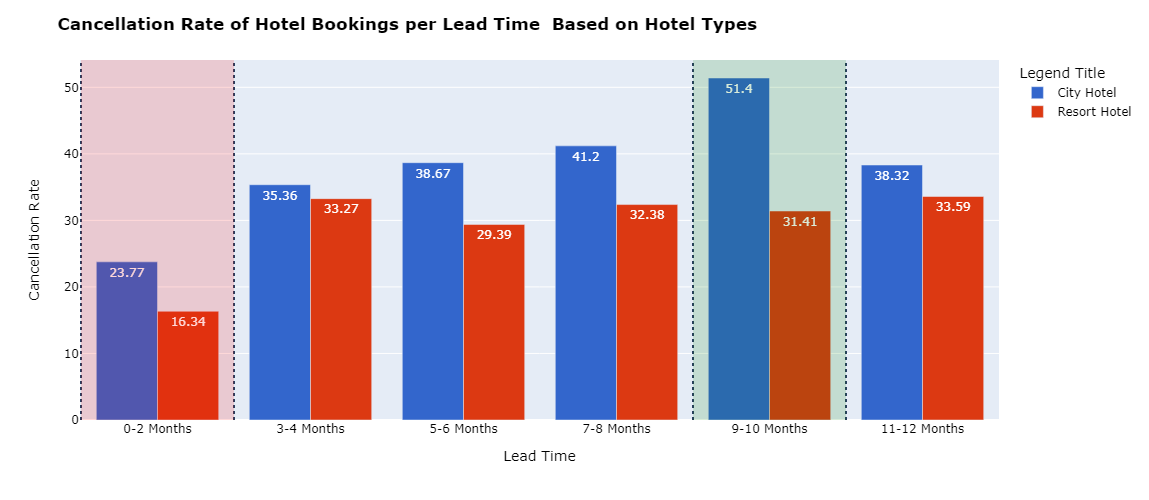

In [22]:
fig = px.bar(df_aggregate,
             x='lead_time_grouping',
             y='cancellation_rate',
             color='hotel_type',
             barmode='group',
             text='cancellation_rate',
             color_discrete_sequence=px.colors.qualitative.G10,
             height=500
            )

fig.add_vline(x=3.5, line_dash="dot")
fig.add_vline(x=4.5, line_dash="dot")
fig.add_vrect(x0='3.5', x1='4.5', col=1,
              fillcolor='green',
              opacity=0.15,
              line_width=0
             )

fig.add_vline(x=-0.5, line_dash="dot")
fig.add_vline(x=0.5, line_dash="dot")
fig.add_vrect(x0='-0.5', x1='0.5', col=1,
              fillcolor='red',
              opacity=0.15,
              line_width=0
             )

fig.update_layout(
    title_text='<b>Cancellation Rate of Hotel Bookings per Lead Time\n Based on Hotel Types<br>',
    xaxis={'categoryorder':'array',
           'categoryarray':['0-2 Months',
                            '3-4 Months',
                            '5-6 Months',
                            '7-8 Months',
                            '9-10 Months',
                            '11-12 Months'
                           ]
          },
    xaxis_title='Lead Time',
    yaxis_title='Cancellation Rate',
    legend_title="Legend Title",
    font=dict(
        size=12,
        color='black'
    )
)
